<a href="https://colab.research.google.com/github/Bigdata92/190902AdvancedVisualPerception/blob/master/VGG_application_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

Using TensorFlow backend.
W0917 11:37:32.519892 140086664533888 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 11:37:32.554203 140086664533888 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 11:37:32.560837 140086664533888 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 11:37:32.605813 140086664533888 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553476096/553467096 [==============================] - 6s 0us/step


W0917 11:37:39.112829 140086664533888 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0917 11:37:39.117610 140086664533888 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [2]:
model.summary() # Param 1792 = 3 * 3 * 3 * 64 + 64 (3X3 filter[정해짐]), Conv 1~5 특징 추출기, FC 1,2 Softmax 분류기 (특징추출기 그대로쓰고 분류기 바꾸는 것을 추천)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
pip install flickrapi

     |████████████████████████████████| 61kB 4.1MB/s 


In [4]:
from flickrapi import FlickrAPI

FLICKER_KEY = '505e8c2b05e8b5aa51766a43fc4bc7a7' #선생님 FLICKER KEY
FLICKER_SECRET = '46b3ef2f43b04ac6'

flickr = FlickrAPI(FLICKER_KEY, FLICKER_SECRET, format='parsed-json')
extras='url_s' # 추출할거 옵션
# extras='url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'

monkeys = flickr.photos.search(text='monkey', per_page=5, extras=extras) #5장 받아오겠다

photos = monkeys['photos']

from pprint import pprint #pretty print : hierarchy 파악하기 쉽게 줄맞춰서 나옴 
pprint(photos)

{u'page': 1,
 u'pages': 208727,
 u'perpage': 5,
 u'photo': [{u'farm': 66,
             u'height_s': u'192',
             u'id': u'48748669016',
             u'isfamily': 0,
             u'isfriend': 0,
             u'ispublic': 1,
             u'owner': u'183405371@N04',
             u'secret': u'ee5306f8e8',
             u'server': u'65535',
             u'title': u'\U0001f435',
             u'url_s': u'https://live.staticflickr.com/65535/48748669016_ee5306f8e8_m.jpg',
             u'width_s': u'240'},
            {u'farm': 5,
             u'height_s': u'160',
             u'id': u'40049370822',
             u'isfamily': 0,
             u'isfriend': 0,
             u'ispublic': 1,
             u'owner': u'23093864@N04',
             u'secret': u'6026decc91',
             u'server': u'4754',
             u'title': u'_DSF0473',
             u'url_s': u'https://live.staticflickr.com/4754/40049370822_6026decc91_m.jpg',
             u'width_s': u'240'},
            {u'farm': 66,
          

In [5]:
photos1 = monkeys['photos']['photo'][0]['url_s']
photos1

u'https://live.staticflickr.com/65535/48748669016_ee5306f8e8_m.jpg'

In [0]:
# import the necessary packages
import numpy as np
import urllib
import cv2

# METHOD #1: OpenCV, NumPy, and urllib
# download the image, convert it to a NumPy array, and then read
# it into OpenCV format
def url_to_image(url):

  resp = urllib.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  
  return image


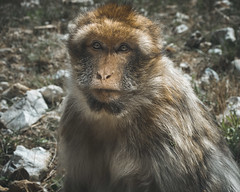

In [58]:
from google.colab.patches import cv2_imshow

image_original_url = photos1 = monkeys['photos']['photo'][0]['url_s']

image_temp = url_to_image(image_original_url)
cv2_imshow(image_temp)

In [59]:
resized_image = cv2.resize(image_temp, (224, 224))
print resized_image.shape

(224, 224, 3)


In [0]:
resized_image = np.expand_dims(resized_image, axis=0)

(1, 224, 224, 3)


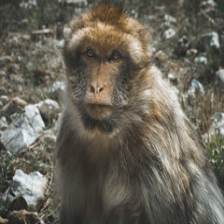

In [61]:
print resized_image.shape
cv2_imshow(resized_image[0])


In [0]:
yhat = model.predict(resized_image)

In [63]:
from keras.applications.vgg16 import decode_predictions # decode_predictions 가 decode 해줌
label = decode_predictions(yhat)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))


macaque (95.75%)
